# **Driving Style Prediction**








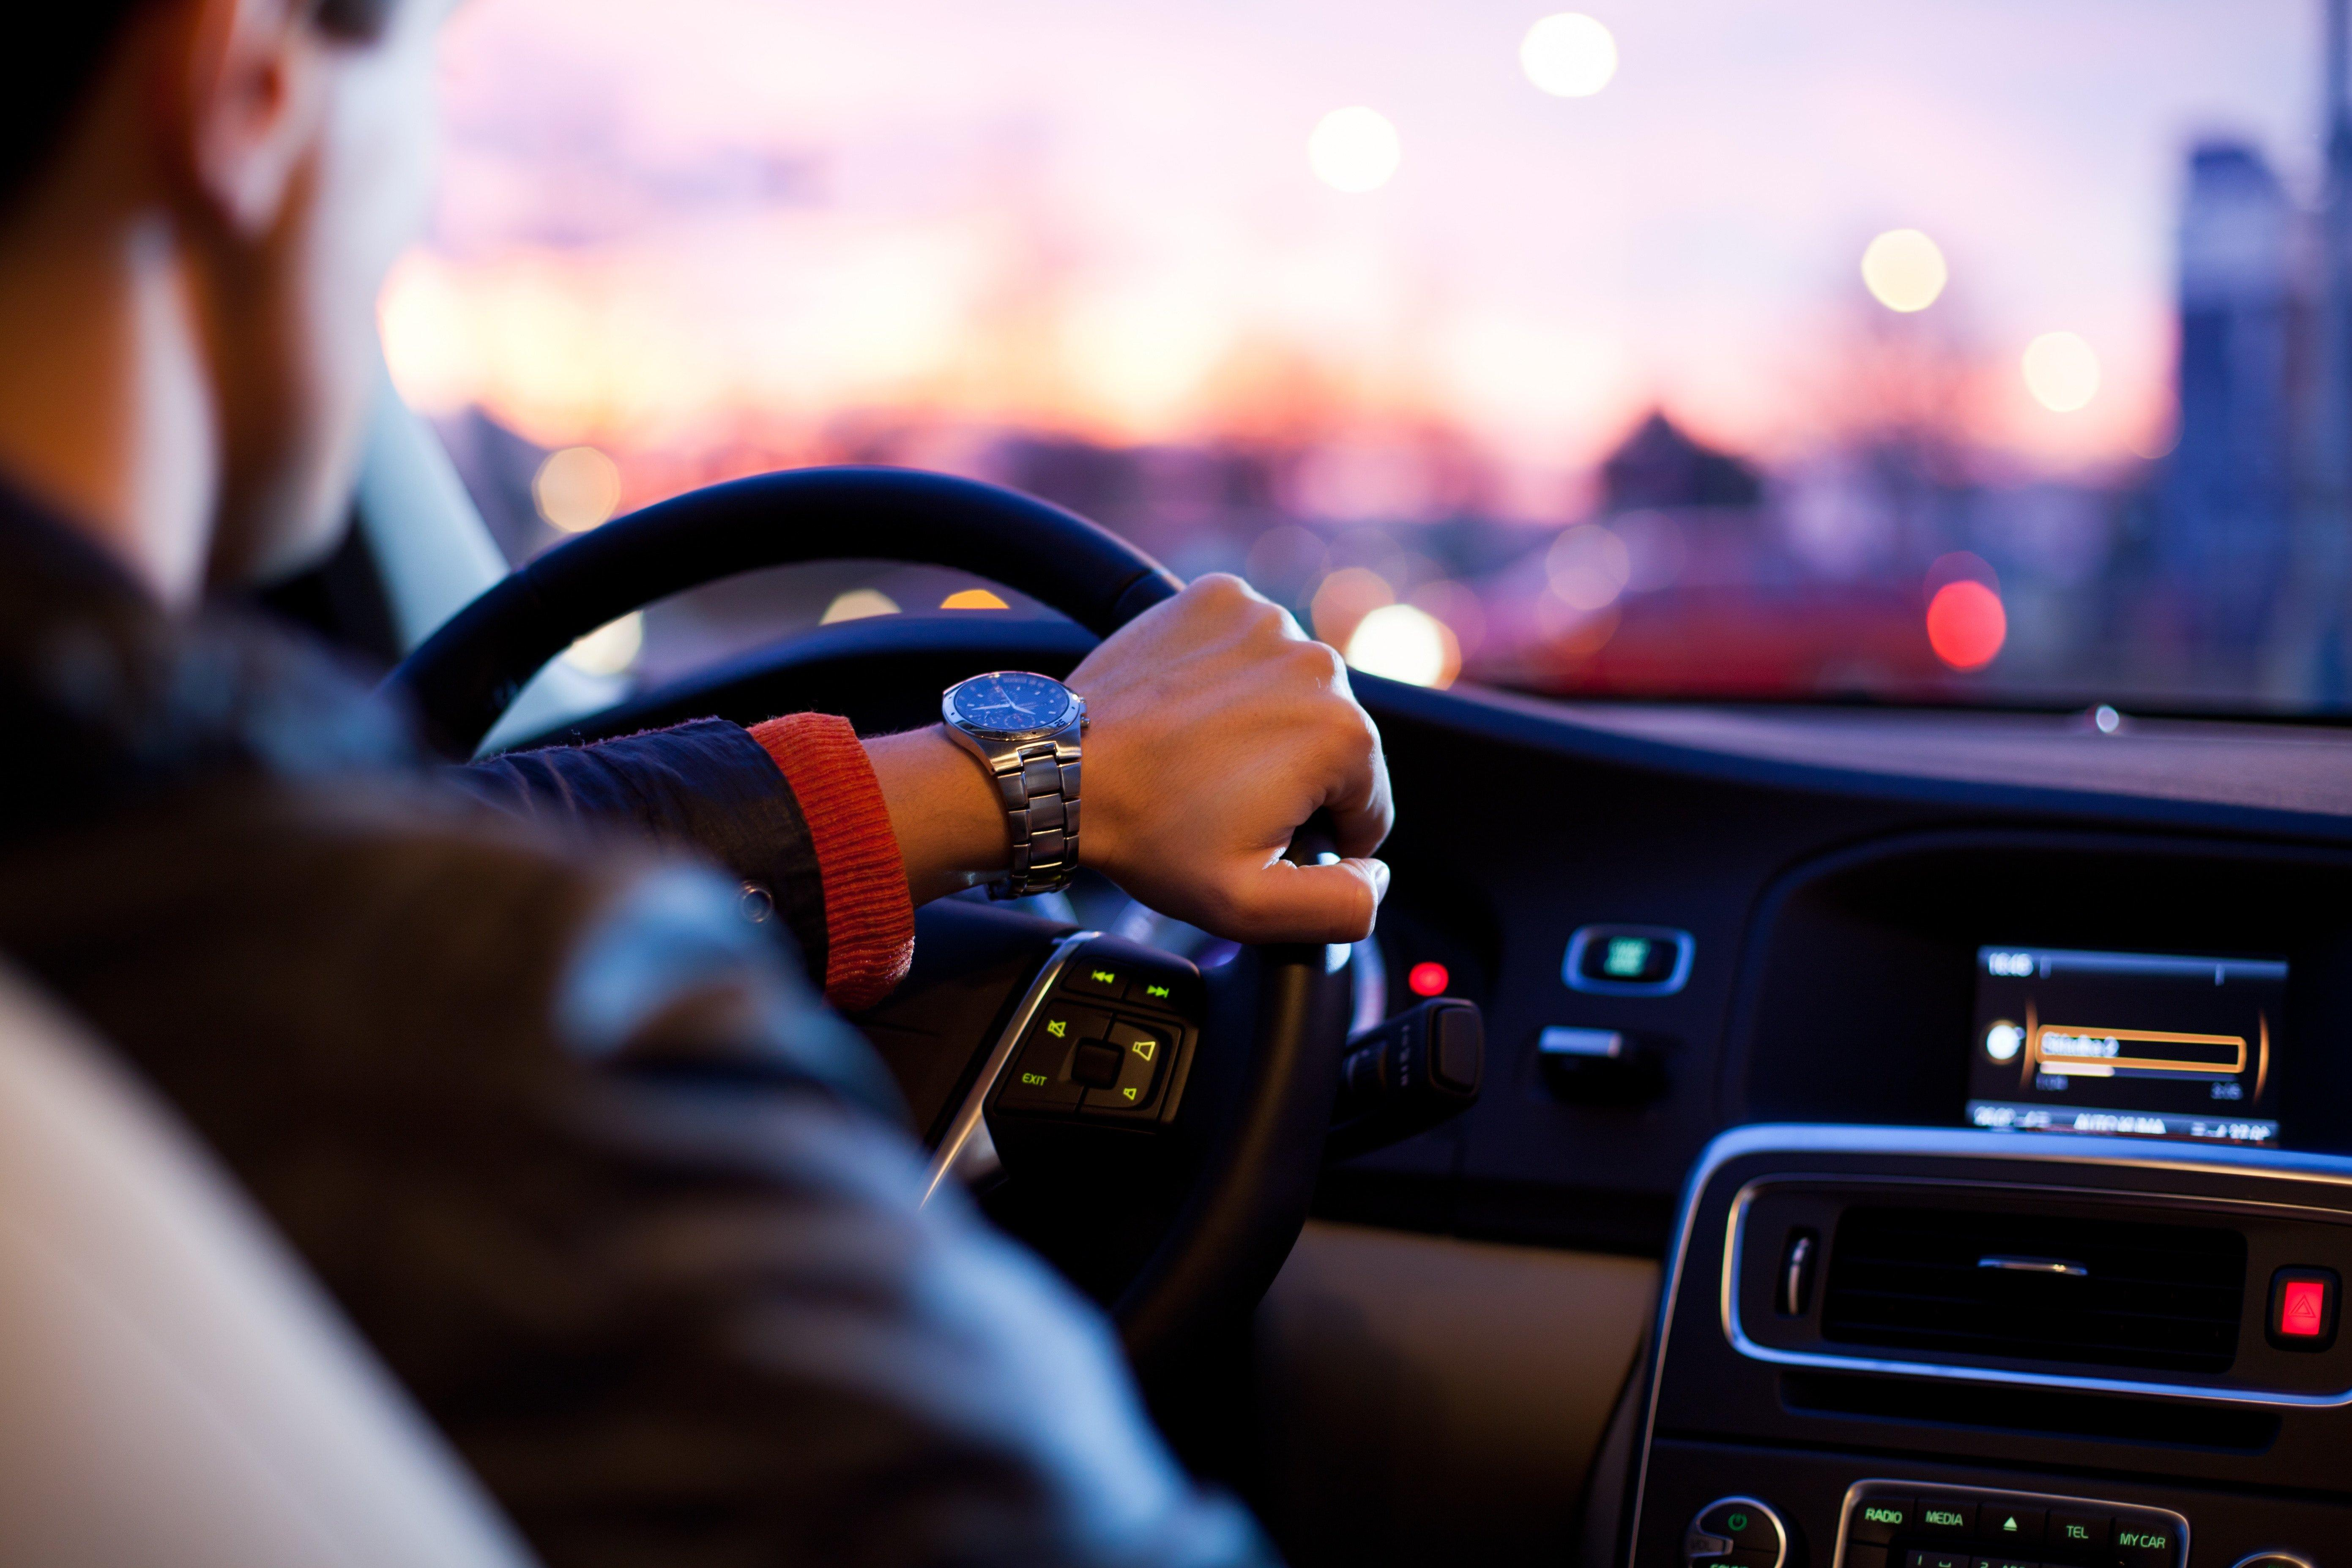

# **Importing Necessary Packages**
**Step 1**

Importing all the necessary python library like numpy, pandas, matplot.lib and seaborn which will help in processing the data, cleaning the data and visualizing the **data** **bold text**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Reading Data from Given Data Source**
**Step 2**

Reading the data from all the different sources like Train, Train Weather Data and Train Vehicle Travelling Data provided to us and merging all the three to form a single data, so that it becomes easy to interpret and also extract meaning full information from it and  dropping column like ID, V7, V14 which we need only to merge data or won't will be helpful for future data interpretation. 

In [ ]:
driver = pd.read_csv('/content/Train.csv')
weather = pd.read_csv('/content/Train_WeatherData.csv')
travelling = pd.read_csv('/content/Train_Vehicletravellingdata.csv')
data_temp = pd.merge(travelling,weather)
data = pd.merge(data_temp,driver)
print(data)
data.drop(["ID","V7","V14"], axis = 1, inplace = True) 

              ID                   V1  V3  V4  ...    V2     V5  V6  DrivingStyle
0       DR_24526  2012-03-21 09:14:55   1  81  ...  1265  10243   2             2
1       DR_24526  2012-03-21 09:15:07   1  88  ...  1265  10243   2             2
2       DR_24526  2012-03-21 09:15:12   1  88  ...  1265  10243   2             2
3       DR_24526  2012-03-21 09:15:48   2  84  ...  1265  10243   2             2
4       DR_24526  2012-03-21 09:15:54   1  89  ...  1265  10243   2             2
...          ...                  ...  ..  ..  ...   ...    ...  ..           ...
162561  DR_69505  2013-04-30 16:54:41   1  88  ...   710   3244   2             2
162562  DR_69505  2013-04-30 16:55:20   2  68  ...   710   3244   2             2
162563  DR_69505  2013-04-30 16:55:21   1  73  ...   710   3244   2             2
162564  DR_56117  2013-04-30 16:55:23   2  69  ...  2001  27812   6             1
162565  DR_56117  2013-04-30 16:57:08   1  86  ...  2001  27812   6             1

[162566 rows x 

Step 3

Trying to interpretate from the describe function that what are the range of values for feature columns and also get the information about the mean, min, max values from the dataset.

In [ ]:
data.select_dtypes(exclude ='object').describe() 

,V3,V4,V8,V9,V10,V11,V12,V15,V16,V17,V2,V5,V6,DrivingStyle
count,162566.000000,162566.000000,162566.000000,162566.000000,162566.000000,160111.000000,160509.000000,160461.000000,160452.000000,160102.000000,162566.000000,162566.000000,162566.000000,162566.000000
mean,1.500849,83.455483,83.458817,5017.562793,790.775285,105.340358,4.654237,60.647509,182.461178,4.188648,865.518349,6020.270481,2.846315,2.147263
std,0.500001,9.375122,9.373120,7399.315434,481.944297,177.202269,3.226701,18.272899,88.927865,3.027595,495.155881,7972.925231,1.466560,0.668102
min,1.000000,8.000000,0.000000,3.000000,102.000000,1.000000,-13.000000,16.000000,6.000000,0.000000,155.000000,44.000000,2.000000,1.000000
25%,1.000000,78.000000,78.000000,1502.000000,527.000000,7.000000,2.000000,46.000000,152.000000,1.000000,550.000000,1625.000000,2.000000,2.000000
50%,2.000000,83.000000,83.000000,1862.000000,560.000000,43.000000,5.000000,58.000000,180.000000,4.000000,577.000000,2013.000000,2.000000,2.000000
75%,2.000000,88.000000,88.000000,2669.000000,701.000000,125.000000,7.000000,76.000000,208.000000,7.000000,1060.000000,6220.000000,3.000000,3.000000
max,2.000000,161.000000,161.000000,69548.000000,2981.000000,1797.000000,24.000000,97.000000,360.000000,17.000000,2337.000000,57230.000000,9.000000,3.000000


# **Handling Missing Values**

**Step 4**

In order to know the missing values in the dataset and which column consist of missing values. I just used a heat map to know which column consist of missing values.


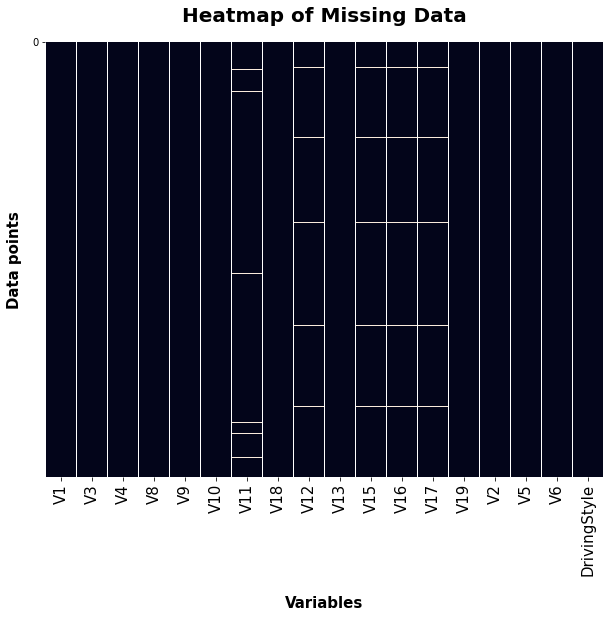

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(data.isna(), cbar=False)
plt.xlabel('Variables', fontsize=15, labelpad=20, fontweight='bold')
plt.ylabel('Data points',  labelpad=10, fontsize=15, fontweight='bold')
plt.title('Heatmap of Missing Data', pad=20, fontsize=20, fontweight='bold')
plt.xticks(fontsize=15);
ax.yaxis.set_ticks(np.arange(0, 100, 100))

In [ ]:
print(data.head())

                    V1  V3  V4  V8  ...    V2     V5  V6 DrivingStyle
0  2012-03-21 09:14:55   1  81  87  ...  1265  10243   2            2
1  2012-03-21 09:15:07   1  88  81  ...  1265  10243   2            2
2  2012-03-21 09:15:12   1  88  88  ...  1265  10243   2            2
3  2012-03-21 09:15:48   2  84  89  ...  1265  10243   2            2
4  2012-03-21 09:15:54   1  89  88  ...  1265  10243   2            2

[5 rows x 18 columns]


**Step 4**

Calculating the number of null values in the complete dataset and also calculating the number of null of null values particular column wise.

In [ ]:
print(("Total null values in complete dataset :")+str(data.isnull().values.sum())) #total null values
print(data.isnull().sum()) #column wise null values

Total null values in complete dataset :11195
V1                 0
V3                 0
V4                 0
V8                 0
V9                 0
V10                0
V11             2455
V18                0
V12             2057
V13                0
V15             2105
V16             2114
V17             2464
V19                0
V2                 0
V5                 0
V6                 0
DrivingStyle       0
dtype: int64


**Step 5**

As from the above we got to know that we have large number of missing values in the dataset and dropping the missing value will result in  loss of large amount of data which can provide us the meaningful value hence we are using mean central tendency method to replance all the missing values. 

In [ ]:
#Handling missing data with the help of central tendency method 
data["V11"].fillna(data["V11"].mean(), inplace = True) 
data["V12"].fillna(data["V12"].mean(), inplace = True) 
data["V15"].fillna(data["V15"].mean(), inplace = True) 
data["V16"].fillna(data["V16"].mean(), inplace = True) 
data["V17"].fillna(data["V17"].mean(), inplace = True) 
print(data.isnull().sum())

V1              0
V3              0
V4              0
V8              0
V9              0
V10             0
V11             0
V18             0
V12             0
V13             0
V15             0
V16             0
V17             0
V19             0
V2              0
V5              0
V6              0
DrivingStyle    0
dtype: int64


# **Exploratory Data Analysis**

**Step 6**

Statisticians and data analysts measure correlation of two numerical variables to find an insight about their relationships. On a dataset with many attributes, the set of correlation values between pairs of its attributes form a matrix which is called a correlation matrix.

Hence here in-order to check the correlation between different features present in the dataset we have used correlation matrix.

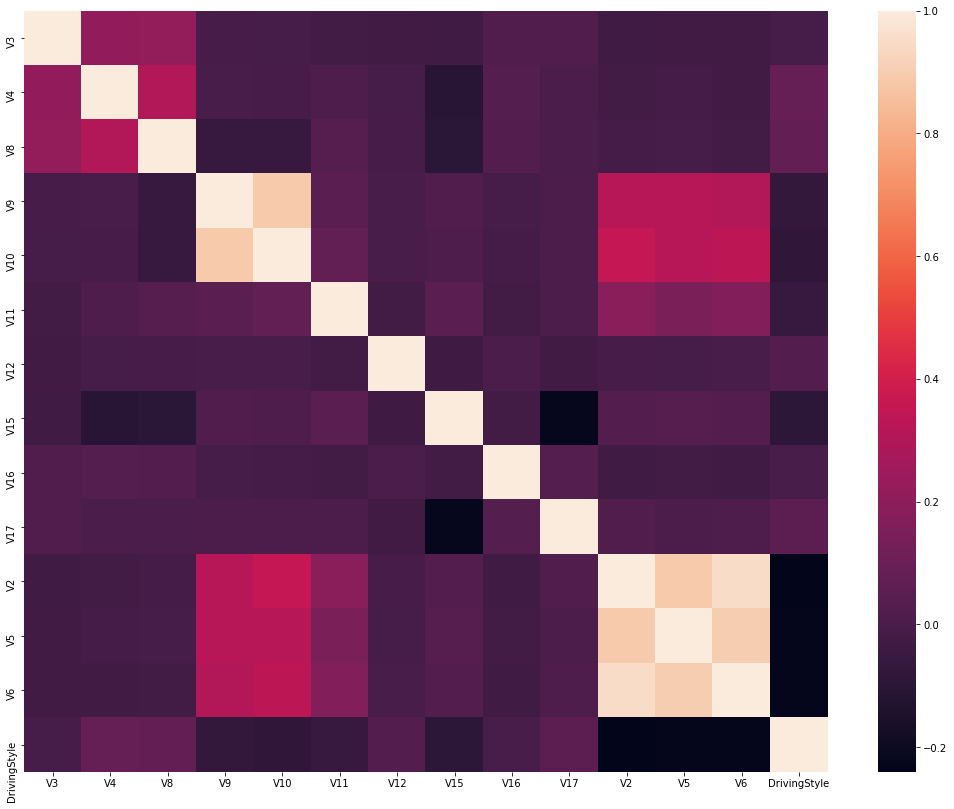

In [ ]:
fig, ax = plt.subplots(figsize=(18, 14))
ax = sns.heatmap(data.corr())

**Step 7**

Inorder to get the insight of dataset based upon some of the selected features that are provide us the meaning insight in this dataset.

Text(0.5, 1.0, 'Speed_limit')

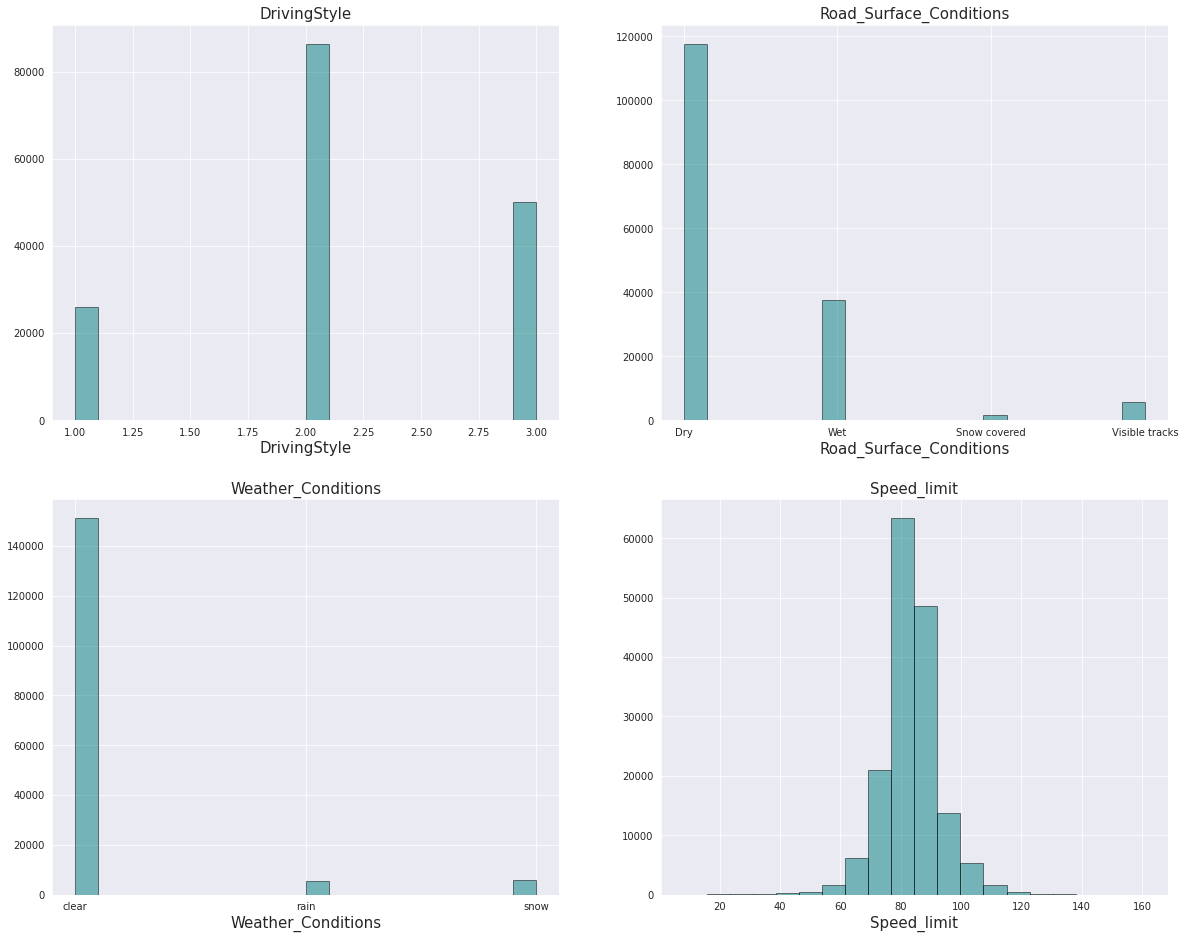

In [ ]:
# Subplots of Numeric Features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,16))
fig.subplots_adjust(hspace = .20)

ax1 = fig.add_subplot(221)
ax1.hist(data['DrivingStyle'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax1.set_xlabel('DrivingStyle', labelpad=3, fontsize = 15)
ax1.set_title('DrivingStyle',fontsize = 15)

ax3 = fig.add_subplot(223)
ax3.hist(data['V13'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax3.set_xlabel('Weather_Conditions',fontsize = 15)
ax3.set_title('Weather_Conditions',fontsize = 15)

ax4 = fig.add_subplot(222)
ax4.hist(data['V18'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax4.set_xlabel('Road_Surface_Conditions',fontsize = 15)
ax4.set_title('Road_Surface_Conditions',fontsize = 15)

ax5 = fig.add_subplot(224)
ax5.hist(data['V4'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax5.set_xlabel('Speed_limit',fontsize = 15)
ax5.set_title('Speed_limit',fontsize = 15)

Text(0.5, 1.0, 'Lane')

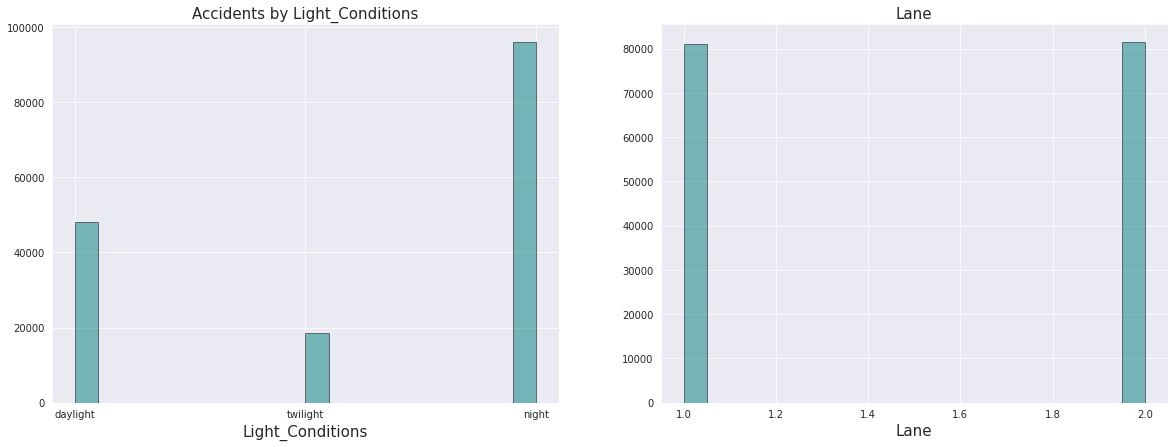

In [ ]:
# Subplots of Numeric Features
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,16))
fig.subplots_adjust(hspace = .30)

ax3 = fig.add_subplot(221)
ax3.hist(data['V19'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax3.set_xlabel('Light_Conditions',fontsize = 15)
ax3.set_title('Accidents by Light_Conditions',fontsize = 15)

ax4 = fig.add_subplot(222)
ax4.hist(data['V3'], bins = 20, alpha = .50,edgecolor= 'black',color ='teal')
ax4.set_xlabel('Lane',fontsize = 15)
ax4.set_title('Lane',fontsize = 15)

**Step 8**

Now declaring the target attribute and the attributes on which it is dependent on.

In [ ]:
#declaring dependent and target features
inputs_all = data.copy()
inputs_all.drop(["V1","DrivingStyle"], axis=1, inplace =True)
targets_all = data['DrivingStyle']

**Step 9**

Next step is the preprocessing the data and doing encoding to convert V-18, V-19 and V-13 into simple form so that it can be used properly

In [ ]:
from sklearn import preprocessing
encoder = preprocessing.OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(data[['V18','V19','V13']]).toarray())
#adding new encoded columns and removing old values from the datasetinputs_all = unscaled_inputs_all.join(encoder_df)
inputs_all = inputs_all.join(encoder_df)

In [ ]:
inputs_all.drop(["V18","V19","V13"], axis = 1, inplace = True)

**Step 10**

Classifying the data based upon the three different class as given by the problem statement and checking how many values belong each different class, so that our data is not biased towards any one particular class.

In [ ]:
# We want to create a "balanced" dataset, so we will have to remove some input/target pairs.
#counting instaces of each target class
#targets_all = data.iloc[:,-1].values
class_1 = 0
class_2 = 0
class_3 = 0
count_else = 0
for i in range(targets_all.shape[0]):
    if targets_all[i] == 1:
        class_1 += 1
    elif targets_all[i] == 2:
        class_2 += 1
    elif targets_all[i] == 3:
        class_3 +=1
    else:
        count_else +=1
print("Class 1: ",class_1)
print("Class 2: ",class_2)
print("Class 3: ",class_3)
print("Others : ",count_else)


Class 1:  26074
Class 2:  86478
Class 3:  50014
Others :  0


In [ ]:
class2_targets_counter = 0
class3_targets_counter = 0

In [ ]:
indices_to_remove = []

In [ ]:
for i in range(targets_all.shape[0]):
    if targets_all[i] == 2:
        class2_targets_counter += 1
        if class2_targets_counter > class_1:
            indices_to_remove.append(i)
    elif targets_all[i] == 3:
        class3_targets_counter += 1
        if class3_targets_counter > class_1:
            indices_to_remove.append(i)
# Create two new variables, one that will contain the inputs, and one that will contain the targets.
# We delete all indices that we marked "to remove" in the loop above.
inputs_all.drop(indices_to_remove, axis=0, inplace =True)
targets_all.drop(indices_to_remove, axis=0, inplace =True)
#Resetting indices from 0 to fill the gaps 
inputs_all.reset_index(drop=True, inplace=True)
targets_all.reset_index(drop=True, inplace=True)
#counting instaces of each target class
targets_all.value_counts()

3    26074
2    26074
1    26074
Name: DrivingStyle, dtype: int64

**Step 11**

Preparing the data for preprocessing and getting ready with the test, train, validation sets for our model building

In [ ]:
from sklearn import preprocessing
inputs_all = preprocessing.scale(inputs_all)

In [ ]:
shuffled_indices = np.arange(inputs_all.shape[0])
np.random.shuffle(shuffled_indices)

In [ ]:
inputs_all = inputs_all[shuffled_indices]
targets_all = targets_all[shuffled_indices]

In [ ]:
#split the dataset into train validation and testset
# Count the total number of samples
samples_count = inputs_all.shape[0]
# Count the samples in each subset, assuming we want 80-10-10 distribution of training, validation, and test.
# Naturally, the numbers are integers.
train_samples_count = int(0.8 * samples_count)
validation_samples_count = int(0.1 * samples_count)
# The 'test' dataset contains all remaining data.
test_samples_count = samples_count - train_samples_count - validation_samples_count
# Create variables that record the inputs and targets for training
# In our shuffled dataset, they are the first "train_samples_count" observations
train_inputs = inputs_all[:train_samples_count]
train_targets = targets_all[:train_samples_count]

In [ ]:
# Create variables that record the inputs and targets for validation.
# They are the next "validation_samples_count" observations, folllowing the "train_samples_count" we already assigned
validation_inputs = inputs_all[train_samples_count:train_samples_count+validation_samples_count]
validation_targets = targets_all[train_samples_count:train_samples_count+validation_samples_count]

In [ ]:
# Create variables that record the inputs and targets for test.
# They are everything that is remaining.
test_inputs = inputs_all[train_samples_count+validation_samples_count:]
test_targets = targets_all[train_samples_count+validation_samples_count:]

In [ ]:
#counting instaces of each target class to check if the dirstribution is iid or not
train_targets.value_counts()
validation_targets.value_counts()
test_targets.value_counts()

1    2626
3    2620
2    2577
Name: DrivingStyle, dtype: int64

In [ ]:
# Save the three datasets in *.npz.
#it is extremely valuable to name them in such a coherent way!
np.savez('driving_data_train', inputs=train_inputs, targets=train_targets)
np.savez('driving_data_validation', inputs=validation_inputs, targets=validation_targets)
np.savez('driving_data_test', inputs=test_inputs, targets=test_targets)

In [ ]:
npz = np.load('driving_data_train.npz')
X_train = npz['inputs'].astype(np.float)
y_train = npz['targets'].astype(np.int)
npz = np.load('driving_data_validation.npz')
X_validation = npz['inputs'].astype(np.float)
y_validation = npz['targets'].astype(np.int)
npz = np.load('driving_data_test.npz')
X_test = npz['inputs'].astype(np.float)
y_test = npz['targets'].astype(np.int)

# **Model Buildng**

**Step 12**

Contructing a Deep Learning Network model to train our data and calculate the accuracy of our created model.

In [ ]:
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
input_size = 23
output_size = 4
hidden_layer_size = 200
early_stopping = tf.keras.callbacks.EarlyStopping(patience =10)
model = tf.keras.Sequential([
            tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
            tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
            tf.keras.layers.Dense(output_size, activation='softmax')
        ])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
batch_size =100
max_epochs =150
model.fit(X_train,y_train,batch_size=batch_size,epochs=max_epochs,
          validation_data=(X_validation,y_validation),
          callbacks = [early_stopping],
          verbose=2)

Epoch 1/150
626/626 - 2s - loss: 0.7514 - accuracy: 0.6707 - val_loss: 0.7144 - val_accuracy: 0.6868
Epoch 2/150
626/626 - 1s - loss: 0.6944 - accuracy: 0.6984 - val_loss: 0.6920 - val_accuracy: 0.7017
Epoch 3/150
626/626 - 1s - loss: 0.6666 - accuracy: 0.7112 - val_loss: 0.6841 - val_accuracy: 0.6984
Epoch 4/150
626/626 - 1s - loss: 0.6432 - accuracy: 0.7239 - val_loss: 0.6515 - val_accuracy: 0.7203
Epoch 5/150
626/626 - 1s - loss: 0.6211 - accuracy: 0.7351 - val_loss: 0.6500 - val_accuracy: 0.7204
Epoch 6/150
626/626 - 1s - loss: 0.6002 - accuracy: 0.7448 - val_loss: 0.6298 - val_accuracy: 0.7300
Epoch 7/150
626/626 - 1s - loss: 0.5801 - accuracy: 0.7551 - val_loss: 0.6039 - val_accuracy: 0.7488
Epoch 8/150
626/626 - 1s - loss: 0.5615 - accuracy: 0.7648 - val_loss: 0.5805 - val_accuracy: 0.7591
Epoch 9/150
626/626 - 1s - loss: 0.5449 - accuracy: 0.7719 - val_loss: 0.5756 - val_accuracy: 0.7605
Epoch 10/150
626/626 - 1s - loss: 0.5274 - accuracy: 0.7809 - val_loss: 0.5620 - val_accura

In [ ]:
#Evaluating model performance
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: {0:.2f}, Test Accuracy: {1:.2f}%d'.format(test_loss, test_accuracy*100)) 

Test loss: 0.33, Test Accuracy: 89.67%d


**Step 13**

Using XGBoost Model to train our model and calculate the accuracy of our model, in the end we have created a confusion matrix that also depict the accuracy of the model.

In [ ]:
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 71.15%


In [ ]:
y_test.shape

(7823,)

Confusion matrix for XGBoost model:
 [[1774  413  439]
 [ 268 1703  606]
 [ 470   61 2089]]


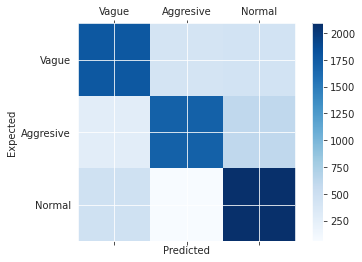

In [ ]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix for XGBoost model:\n', conf_mat)

labels1 = ['Vague', 'Aggresive','Normal']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels1)
ax.set_yticklabels([''] + labels1)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

**Step 14**

Used a Decision Tree Model to train our model and calculate the accuracy of our model, and inorder to evaluate the performance of the model calcualted the created a classification report

In [ ]:
#Decision Tree
from sklearn import tree
classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)
accuracy = metrics.accuracy_score(y_test,y_pred)
print('Accuracy = {0:.2f}%'.format(accuracy*100))
print( "{0}".format(metrics.classification_report(y_test,y_pred)))

[[2547   38   41]
 [  36 2499   42]
 [  42   26 2552]]
Accuracy = 97.12%
              precision    recall  f1-score   support

           1       0.97      0.97      0.97      2626
           2       0.98      0.97      0.97      2577
           3       0.97      0.97      0.97      2620

    accuracy                           0.97      7823
   macro avg       0.97      0.97      0.97      7823
weighted avg       0.97      0.97      0.97      7823



# **Conclusion**

After training our dataset by using all Deep Learning Model, XGBoost Algorithm and Decison Tree Algorithm, we can see that the highest accuracy we got from the decision tree algorithm which is **97.12%**, hence predicting the most accurate values.